<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 1 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-2</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques:
1. El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves.
2. El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes.
3. El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Se propone trabajar con la tangente hiperbólica, en particular, a la función se le pueden aplicar los siguientes desarrollos algebraicos:

$$ f(x) = \frac{2^x - 2^{-x}}{2^x + 2^{-x}} = \frac{2^x}{2^x} \cdot \frac{1 - 2^{-2x}}{1 + 2^{-2x}} = \frac{1 - 2^{-2x}}{1 + 2^{-2x}}$$  

Además, se presenta la siguiente modificación a la "Tangente Hiperbólica" según el parámetro $k$, en donde $f_{1}(x) = f(x)$.

$$ f_k(x) = \frac{1 - 2^{-2^kx}}{1 + 2^{-2^kx}} $$

Considere la siguiente expresión,

$$  \xi(x) = \prod_{k=0}^{\infty} \left( 2 - f_k(x) \right) = \prod_{k=0}^{\infty} \left( 2 - \frac{1 - 2^{-2^kx}}{1 + 2^{-2^kx}} \right) $$

Por conveniencia, aplicaremos la función $\log(x)$, que corresponde al logaritmo natural, entonces se obtiene la siguiente expresión,

$$ \log(\xi(x)) = \sum_{k=0}^{\infty} \log \left( 2 - \frac{1 - 2^{-2^kx}}{1 + 2^{-2^kx}} \right) $$

Sea $g(x, k)$ el argumento de la sumatoria. Se puede considerar un valor para $k$ fijo y variar el valor de $x$ con el objetivo de analizar el comportamiento de dicha función según el valor de este último parámetro, por completitud se muestra la función:

$$g(x, k) = \log \left( 2 - \frac{1 - 2^{-2^kx}}{1 + 2^{-2^kx}} \right)$$

Sean las funciones $\text{top}(x,k)$ y $\text{bot}(x,k)$ que corresponden a la expresión del numerador y denominador respectivamente de la fracción en el argumento de la función $g(x,k)$


# Funciones Entregadas (No debe modificarlas)

In [33]:
#No modificar este código, solamente ejecute.

#Función que calcula el valor del numerador de la fracción en la función g
top = lambda x, k: 1.0 - np.power(2.0, np.power(2.0, k)*-1.0*x)

#Función que calcula el valor del denominador de la fracción en la función g
bot = lambda x, k: 1.0 + np.power(2.0, np.power(2.0, k)*-1.0*x)

#Función que calcula el valor de la función g
g = lambda x, k:  np.log(2 - top(x, k) / bot(x, k))


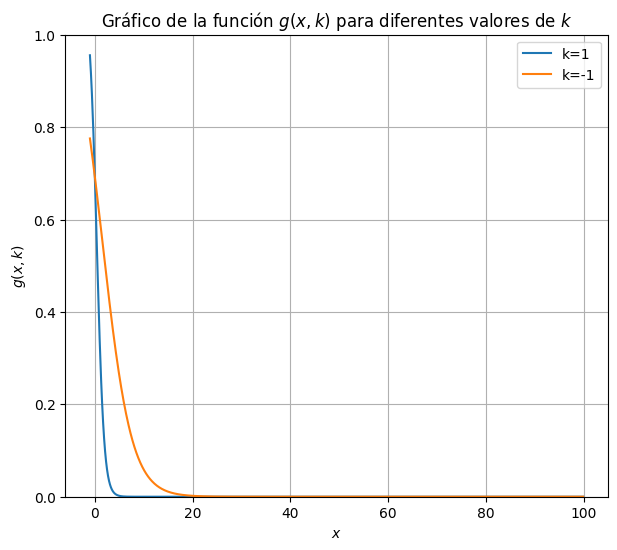

In [34]:
#No modificar este código, solamente ejecute.
x_i = np.arange(-1,100,0.1)
k_1 =  np.ones(np.size(x_i))
k_m1 = np.ones(np.size(x_i))*-1

y_k1 = g(x_i,k_1)
y_km1 = g(x_i,k_m1)

fig, ax = plt.subplots(figsize=(7, 6))
plt.plot(x_i, y_k1,  label='k=1')
plt.plot(x_i, y_km1, label='k=-1')
ax.set_ylim(0, 1)

plt.xlabel('$x$')
plt.ylabel('$g(x,k)$')
plt.title('Gráfico de la función $g(x,k)$ para diferentes valores de $k$')
plt.legend()
plt.grid(True)
plt.show()

# Pregunta 1



1.1 **(15 puntos)** Encuentre el menor $x \in \mathbb{N}$ tal que la función $g(x, k)=0$ en *double precision* para los siguientes valores de $k$:

* $k = 1$
* $k = -1$

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

Para que la función  $g(x, k)$ cumpla con: $g(x, k)=0$, lo que debe suceder es lo siguiente: $$ \left(\frac{1 - 2^{-2^kx}}{1 + 2^{-2^kx}} \right) = 1$$

Esto sucede cuando existe una perdida de importancia al realizar las siguientes operaciones:

$$        {1 - 2^{-2^kx}}     $$
$$        {1 + 2^{-2^kx}}     $$

Con un x suficientemente grande, el termino $2^{-2^kx}$ tendrá una diferencia de magnitud mayor a 52 bits,en *double precision*, al 1,por ende la suma/resta entre 1 y $2^{-2^kx}$ será igual a 1, ocacionando una perdida de importancia y en consecuencia $g(x, k)=0$ . 

Si representamos al 1 en base dos tenemos que las operaciones son : ${2^{0} - 2^{-2^kx}}$ y ${2^{0} + 2^{-2^kx}}$.Como se dijo anteriormente, para encontrar al mínimo x que ocacione una pérdida de importancia, tiene que haber una diferencia de 52 bits de magnitud , es decir, se debe cumplir la diferencia de magnitudes:
$${{2^kx}-0}>52$$
Equivalentemente a :
$${{2^kx}}>52$$
Despenado x:
$${{x}}>\frac{52}{{2^k}}$$


Si $k=1$:
$${{x}}>\frac{52}{{2^{1}}}$$
Equivalentemente:
$${{x}}>26$$
Si $k=-1$:
$${{x}}>\frac{52}{{2^{-1}}}$$
Equivalentemente:
$${{x}}>104$$

En conclusión: Sabemos que si $k=1$, entonces el x mínimo el cual se cumple $g(x, k)=0$ es 27. Por otro lado si $k=-1$, entonces el x mínimo el cual se cumple $g(x, k)=0$ es 105.



**---------------------------------------------------------------------------------------------------------------------------**

1.2 **(10 puntos)** Construya la función `find_x` la cual recibe como parámetros la función `bot` o `top`, un valor de $k$ y el máximo valor que puede tomar $x$. La función debe retornar el valor de $x \in \mathbb{N}$ tal que la función $g(x, k)=0$ en *double precision*, dado un valor $k$.

*Hint: for convenience only use positive integer values for $x$.*

In [35]:
def find_x(fun, k, x_max=1000):
    """
    input:
    fun    : (callable) function bot or top.
    k      : (int) value of k.
    x_max  : (int) maximum value of x to be searched.

    output:
    x      : (int) value of x that causes significant loss.
    """
    #acá va su codigo
    #--------------------------------
    array_x=np.arange(1,x_max+1,1)
    for i in array_x:
        if fun(i,k)==1:
            x=i
            break
    #--------------------------------
    return x

1.3 **(10 puntos)** Evalúe la función `find_x` para $\text{bot}(x,k)$ y $\text{top}(x,k)$ considerando $k=-1$ y $k=1$. Explique los resultados obtenidos.

In [36]:
#acá va su codigo
#--------------------------------

#Para k=1
x1_top=find_x(top,1)
x1_bot=find_x(bot,1)
print(f'x1_top: {x1_top}')
print(f'x1_bop: {x1_bot}')
#Para k=-1
x_top=find_x(top,-1)
x_bot=find_x(bot,-1)
print(f'x_top: {x_top}')
print(f'x_bot: {x_bot}')
#--------------------------------

x1_top: 27
x1_bop: 27
x_top: 108
x_bot: 106


**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**

Se puede observar del gráfico que para $k=-1$, la función $g(x,k)$ disminuye mucho más lentamente a medida que x aumenta,por ende,para que haya pérdida de importancia, se necesita un $x$ mucho grande que para $k=1$($x>27$ teoricamente) .En este caso,mediante la funcion find,se comprueba lo anterior,puesto que con $k=-1$ ,x debe ser mayor a 108 en el caso de top y mayor a 106 en el caso de bot para hacer cumplir que $fun(x,k)=1$ y en consecucia  $g(x,k)$=0. Ahora ,existe una discrepancia en el valor de x para k=-1 teorico y el obtenido mediante find(x),esto sucede porque los bits menos significativos del termino $2^{-2^{-1}x}$   se pierden en el proceso de redondeo.Esto hace que el x mínimo sea distinto para top y para bot con k=-1. En cambio , para k=1 la convergencia es mas rápida, según el gráfico,por ende se necesita un x mas pequeño $x>27$. Al ser una convergencia mas rápida, la igualdad de mi código encontrá que $fun(x,k)=1$ de manera exacta, haciendo que hayan menor errores de redondeo y logrando una concordancia entre el valor teórico y el obtenido por la función find

**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 2

La precisión de las representaciones de números flotantes es crucial en la computación científica, ya que la exactitud de los cálculos depende directamente de la forma en que se representan los números en un computador. Las decisiones sobre qué tipo de representación utilizar pueden influir significativamente en los resultados obtenidos, en la estabilidad de los algoritmos y en la eficiencia computacional. Es por ello que es interesante comparar diferentes representaciones, en este caso se compararán con $16$ bits (half precision), $32$ bits (single precision) y $64$ bits (double precision).

 2.1 **(20 puntos)** Construya la función `representation_difference` la cual recibe un arreglo de valores, y dos representaciones de punto flotante (puede asumir que estas serán $16$, $32$ o $64$, y no otro numero). Esta función deberá retornar la diferencia (en valor absoluto) al utilizar las dos representaciones solicitadas con cada número del arreglo.
 
*Hint: it may be useful to use `np.float16` and some similar numpy functions.*

In [37]:
def representation_difference(arr, p1, p2):
    """
    input:
    arr   : (ndarray) array of values.
    p1    : (int)     precision 1 to compare (16, 32 or 64).
    p2    : (int)     precision 2 to compare (16, 32 or 64).
    
    output:
    diff  : (ndarray) array of differences between both representations.
    """
    #acá va su codigo
    #--------------------------------
    
    #--------------------------------
    return diff

2.2 **(15 puntos)** A continuación se presentan los siguientes gráficos, los cuales, con ayuda de la función implementada en el inciso anterior, muestran el comportamiento de la diferencia entre las precisiones seleccionadas al aumentar la cantidad de decimales utilizados para representar cierto valor.

Explique a qué se debe este comportamiento y los factores involucrados.

In [38]:
#No modificar este código, solamente ejecute.
array_to_compare = np.array(
                          [1. , 
                           1.12, 
                           1.1234, 
                           1.123412, 
                           1.12341234, 
                           1.1234123412, 
                           1.123412341234, 
                           1.12341234123412, 
                           1.1234123412341234, 
                           1.123412341234123412, 
                           1.12341234123412341234]
                           )

amount_of_decimals = np.arange(0,21,2)

differences_16_32 = representation_difference(array_to_compare, 16, 32)
differences_16_64 = representation_difference(array_to_compare, 16, 64)
differences_32_64 = representation_difference(array_to_compare, 32, 64)

fig, ax = plt.subplots(1, 3, figsize=(22, 5))

ax[0].plot(amount_of_decimals, differences_16_32, label='16-32')
ax[0].set_title('Diferencia entre representaciones de 16 y 32 bits')
ax[0].set_xlabel('Cantidad de decimales utilizados')
ax[0].set_ylabel('Diferencia')
ax[0].set_xticks(np.arange(0, 21, 2))
ax[0].grid(True)

ax[1].plot(amount_of_decimals, differences_16_64, label='16-64')
ax[1].set_title('Diferencia entre representaciones de 16 y 64 bits')
ax[1].set_xlabel('Cantidad de decimales utilizados')
ax[1].set_ylabel('Diferencia')
ax[1].set_xticks(np.arange(0, 21, 2))
ax[1].grid(True)

ax[2].plot(amount_of_decimals, differences_32_64, label='32-64')
ax[2].set_title('Diferencia entre representaciones de 32 y 64 bits')
ax[2].set_xlabel('Cantidad de decimales utlizados')
ax[2].set_ylabel('Diferencia')
ax[2].set_xticks(np.arange(0, 21, 2))
ax[2].grid(True)

plt.show()

NameError: name 'diff' is not defined

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**


**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 3

Se dispone de la siguiente función, la cual presenta un error de cancelación a medida que el valor de $x$ aumenta.

$$h(x) = \frac{1}{1 - \sqrt{1+2^{-x}}}$$

Para mostrar el error de cancelación se desarrolló el siguiente gráfico. Notar que la función sufrirá de una división por $0$ para valores de $x$ suficientemente grandes. No hay problema con lo anterior, pues aquellos puntos que indeterminan la función son ignorados por *matplotlib* al momento de graficar.

In [ ]:
#No modificar este código, solamente ejecute.
h = lambda x: 1.0/(1.0 - np.sqrt(1.0 + np.power(2.0, -x)))
x = np.arange(40, 60, 1)
hx = h(x)

fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(x, hx, 'b.')

ax.set_xlim(40, 60)
ax.set_ylim(-10e15, 0)
ax.set_xlabel("x")
ax.set_ylabel("h(x)")
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

3.1 **(15 puntos)** Modifique la función $h(x)$ para solucionar el error de cancelación

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**


**---------------------------------------------------------------------------------------------------------------------------**

3.2 **(10 puntos)** Implemente la función sin error de cancelación y grafique su comportamiento (asegúrese de que sea un gráfico de puntos y no de línea) para $x \in [40, 60]$, considere que $x \in \mathbb{N}$.

In [ ]:
#acá va su código
#--------------------------------

#--------------------------------

3.3 **(5 puntos)** De acuerdo con lo obtenido en los incisos anteriores ¿Su nueva función logró mejorar en la precisión? En ese caso explique el por qué.

*Hint: establishing axis limits may be useful to make comparisons between plots.*

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**


**---------------------------------------------------------------------------------------------------------------------------**




**¡Ya ha llegado al final de la tarea 1! Ahora debe enviarla antes de las 23:55 hrs. del viernes 30 de agosto!**  

**Recuerde que el archivo de entrega debe seguir el siguiente formato: “apellido1_apellido2_tarea_numero.ipynb” en minúsculas, y no olvide revisar el reglamento de tareas.**
